In [9]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
! pip install opencv-python

In [10]:
import cv2

In [11]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Firstly, we want to calculate the NDVI values for both images, and print the results




In [12]:
def calculate_ndvi(red_band, nir_band):
    # Calculate the NDVI values
    ndvi = (nir_band - red_band) / (nir_band + red_band)
    return ndvi

def read_image(image_path):
    # Opens image file
    with rasterio.open(image_path) as src:
        # Read red and near-infrared bands
        red_band = src.read(1).astype(np.float32)
        nir_band = src.read(4).astype(np.float32)
        return red_band, nir_band

if __name__ == "__main__":
    # Paths to the images, imput your own here,  with r" at the start so python can read it correctly.
    image1_path = r"C:\Users\r_rud\Downloads\LC08_L1TP_203022_20231015_20231102_02_T1_B5.TIF"
    image2_path = r"C:\Users\r_rud\Downloads\LT05_L1TP_203022_19890307_20200916_02_T1_B5.TIF"
    
    # Read images
    image1_red, image1_nir = read_image(image1_path)
    image2_red, image2_nir = read_image(image2_path)
    
    # Calculate the NDVI for each image
    ndvi_image1 = calculate_ndvi(image1_red, image1_nir)
    ndvi_image2 = calculate_ndvi(image2_red, image2_nir)
    
    # Prints the NDVI values
    print("NDVI for Image 1:")
    print(ndvi_image1)
    print("\nNDVI for Image 2:")
    print(ndvi_image2)

NDVI for Image 1:
[[0.7288136  0.722973   0.722973   ... 0.84782606 0.84782606 0.84782606]
 [0.7056856  0.7        0.7346939  ... 0.8545455  0.8545455  0.84782606]
 [0.7171717  0.74061435 0.7525773  ... 0.84782606 0.84782606 0.84782606]
 ...
 [0.7525773  0.7708333  0.7586207  ... 0.74061435 0.7525773  0.7647059 ]
 [0.7647059  0.7832168  0.7832168  ... 0.7832168  0.7894737  0.79577464]
 [0.77700347 0.7832168  0.77700347 ... 0.79577464 0.79577464 0.79577464]]

NDVI for Image 2:
[[0.954023   0.954023   0.96153843 ... 0.65584415 0.6612378  0.6612378 ]
 [0.954023   0.954023   0.96153843 ... 0.6612378  0.6612378  0.6612378 ]
 [0.954023   0.954023   0.954023   ... 0.6721311  0.65584415 0.65048546]
 ...
 [0.7708333  0.7114094  0.6831683  ... 1.         1.         1.        ]
 [0.7894737  0.7647059  0.7288136  ... 1.         1.         1.        ]
 [0.8149466  0.8214286  0.7586207  ... 1.         1.         1.        ]]


In [ ]:
# To visualise these results, we can use the code below to print maps of the two images, showing their NDVI values



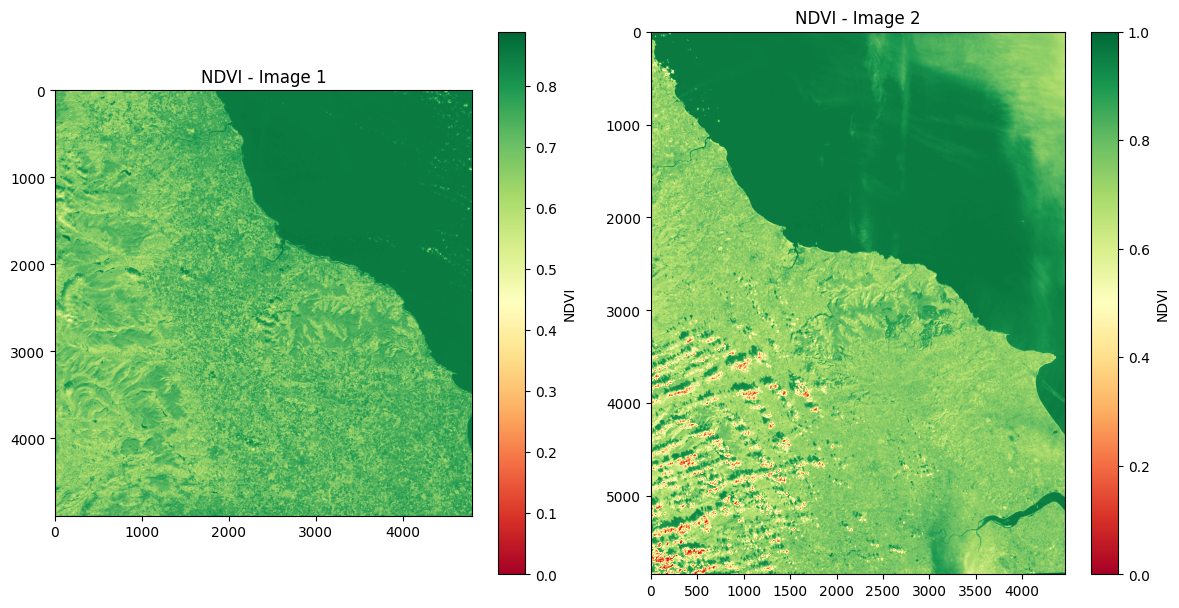

In [13]:


def calculate_ndvi(red_band, nir_band):
    # Calculate NDVI
    ndvi = (nir_band - red_band) / (nir_band + red_band)
    return ndvi

def read_image(image_path):
    # Open image file
    with rasterio.open(image_path) as src:
        # Read red and near-infrared bands
        red_band = src.read(1).astype(np.float32)
        nir_band = src.read(4).astype(np.float32)
        return red_band, nir_band

def save_ndvi_image(ndvi, output_path):
    # Create a new raster profile
    profile = {
        'driver': 'GTiff',
        'dtype': rasterio.float32,
        'count': 1,
        'width': ndvi.shape[1],
        'height': ndvi.shape[0],
        'crs': rasterio.crs.CRS.from_epsg(4326),
        'transform': rasterio.transform.from_origin(0, 0, 1, 1)
    }
    
    # Write NDVI to a new raster file
    with rasterio.open(output_path, 'w', **profile) as dst:
        dst.write(ndvi, 1)

if __name__ == "__main__":
    # Paths to the images
    image1_path = r"C:\Users\r_rud\Downloads\LC08_L1TP_203022_20231015_20231102_02_T1_B5.TIF"
    image2_path = r"C:\Users\r_rud\Downloads\LT05_L1TP_203022_19890307_20200916_02_T1_B5.TIF"
    
    # Read images
    image1_red, image1_nir = read_image(image1_path)
    image2_red, image2_nir = read_image(image2_path)
    
    # Calculate NDVI for each image
    ndvi_image1 = calculate_ndvi(image1_red, image1_nir)
    ndvi_image2 = calculate_ndvi(image2_red, image2_nir)
    
    # Visualize NDVI as images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(ndvi_image1, cmap='RdYlGn')
    plt.title('NDVI - Image 1')
    plt.colorbar(label='NDVI')
    
    plt.subplot(1, 2, 2)
    plt.imshow(ndvi_image2, cmap='RdYlGn')
    plt.title('NDVI - Image 2')
    plt.colorbar(label='NDVI')
    
    plt.tight_layout()
    plt.show()

In [ ]:
# Next, we want to see the change between the two images. The first image is from 2023, and the second is from 1989. 

# In order to run, the two images must be equal in size. This means using the resize_images function

# We need to highlight the changes, set the threshold, and apply a mask so that the changes are highlighted.




In [14]:
from PIL import Image, ImageChops, ImageDraw

def resize_images(image1, image2):
    #  the minimum dimensions
    min_width = min(image1.width, image2.width)
    min_height = min(image1.height, image2.height)

    # resizes both images to the minimum dimensions
    image1_resized = image1.resize((min_width, min_height))
    image2_resized = image2.resize((min_width, min_height))

    return image1_resized, image2_resized

def highlight_changes(image1, image2):
    # convert both of the images to grayscale
    image1_gray = image1.convert("L")
    image2_gray = image2.convert("L")

    # derrives the absolute difference between the two images
    diff = ImageChops.difference(image1_gray, image2_gray)

    # Threshold the difference image to highlight changes, the threshold can be changed but between 20 and 30 provides the best results
    threshold = 25
    diff = diff.point(lambda p: 255 if p > threshold else 0)

    # Creates a red  mask that highlights change
    red_mask = Image.new("RGB", image1.size, (255, 0, 0))

    # Applies the red  mask to show the differences
    highlighted_changes = Image.composite(red_mask, image1, diff)

    return highlighted_changes

def main():
    # Insert your own file path, make sure to put r before the quotations so python can read it, equally you can insert \\ where the / are instead of the r
    image1_path = r"C:\Users\r_rud\Downloads\LC08_L1TP_203022_20231015_20231102_02_T1_B5.TIF"
    image2_path = r"C:\Users\r_rud\Downloads\LT05_L1TP_203022_19890307_20200916_02_T1_B5.TIF"

    # Opens image of the change
    image1 = Image.open(image1_path)
    image2 = Image.open(image2_path)

    # Resize images to have the same dimensions
    image1, image2 = resize_images(image1, image2)

    # Highlight changes between the images
    highlighted_image = highlight_changes(image1, image2)

    # Displays the highlighted changes
    highlighted_image.show()

    # Close images
    image1.close()
    image2.close()
    highlighted_image.close()

if __name__ == "__main__":
    main()
